>#  HW1. 지역명(구 단위)을 입력받아서 시각화
학번: A70064, 이름: 안종민

목표: 사용자로부터 구 단위 행정구역명을 입력받아 해당 구(동단위 포함)의 연령별 인구 수를 시각화합니다.

데이터 출처: 행정안전부 주민등록인구통계 CSV 파일 (`population_total.csv`)

시각화 도구: `Python`, `Matplotlib`

---
---

### 1. 환경 설정 & 드라이브 마운트

- 라이브러리 임포트, 한글 폰트 설치 및 캐시 갱신, Colab 드라이브 마운트 등을 실행합니다.

In [ ]:
# 라이브러리 임포트 및 구글 드라이브 마운트

from google.colab import drive
import os
import csv
import matplotlib.pyplot as plt

# 한글 폰트 설치 & 캐시 갱신
# 시스템에 나눔글꼴 설치 (fonts-nanum)
!apt-get install fonts-nanum -qq
# 새로 설치된 폰트를 Matplotlib 등에서 인식하도록 캐시 갱신
!fc-cache -fv
import matplotlib.font_manager as fm

drive.mount('./gdrive', force_remount=True)
print(os.getcwd())

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache director

### 2. 데이터 로드

- `population_total.csv` 파일을 열고 헤더를 건너뛴 뒤, 리스트로 변환합니다.
- 인코딩 확인: CSV 파일이 `CP949(euc-kr)` 인코딩일 경우 `encoding='cp949'` 지정

In [ ]:
# 데이터 로드

f = open('./gdrive/MyDrive/Colab Notebooks/ch5_population/population_total.csv', 'r', encoding='cp949')
data = csv.reader(f, delimiter=',')
header = next(data)  # 첫 줄은 헤더이므로 건너뛰기

### 3. 사용자 입력 및 데이터 추출

- 사용자로부터 구 이름을 입력받고, 해당 구의 한 행(`row`)을 찾아 연령별 인구 수 리스트로 변환합니다.

In [ ]:
# 쿼리에 대한 데이터 추출

gu_name = input('인구 구조를 알고 싶은 구의 이름을 입력하세요 (ex: 종로구): ')

result = []
for row in data:
    if gu_name in row[0]:  # 예: "서울특별시 종로구 사직동"
        # 남/여 인구수 합산하여 연령대별로 저장
        for i in row[3:]:
            result.append(int(i.replace(',', '')))  # 천 단위 구분 쉼표 제거 후 숫자로 변환
        break
else:
    f.close()
    raise ValueError(f"'{gu_name}' 데이터를 찾을 수 없습니다.")

f.close()

인구 구조를 알고 싶은 구의 이름을 입력하세요 (ex: 종로구): 강남구


### 4. 시각화 설정

- 폰트를 `Matplotlib`에 등록하고, 스타일 및 그래프 크기를 설정합니다.

In [ ]:
# 데이터 시각화

# 폰트 파일 경로 지정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
# 폰트를 Matplotlib 전역에 추가
fm.fontManager.addfont(font_path)
# 폰트 내부 이름 확인 (optional)
font_prop = fm.FontProperties(fname=font_path)
# rcParams 에서 이 이름을 기본 폰트로 설정
plt.rc('font', family=font_prop.get_name())
# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

### 5. 그래프 그리기 및 출력

- `plt.plot()` 또는 `plt.bar()` 등을 사용해 시각화한 뒤, 제목과 축 레이블을 설정하고 보여줍니다.

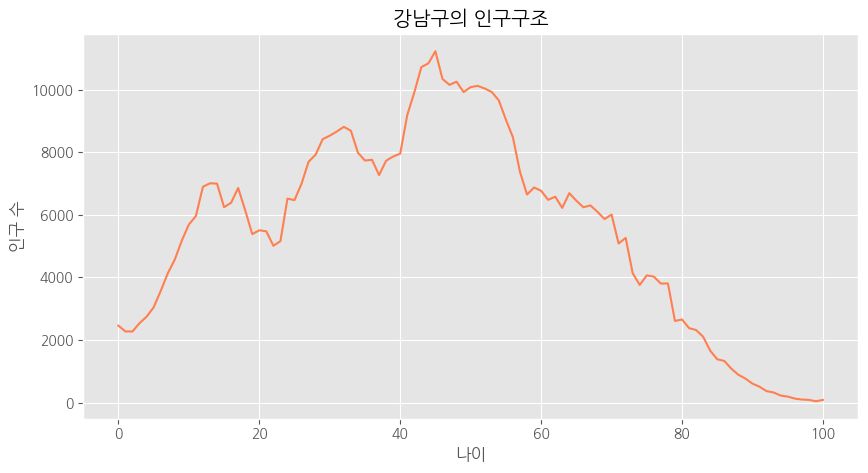

In [ ]:
# 시각화 그래프 출력

plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.plot(result, color='coral')
plt.title(f'{gu_name}의 인구구조')
plt.xlabel('나이')
plt.ylabel('인구 수')
plt.show()